In [7]:
import numpy as np
import pandas as pd
import plotly

from preprocessing import *

toy_dict = load_obj("pop_movies")

df1 = pd.DataFrame(toy_dict).T
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
tt10310140,Fatman,(2020),R,100 min,"Action, Comedy, Fantasy",6.0,40,"5,313",,"Eshom Nelms, Ian Nelms","Mel Gibson, Walton Goggins, Marianne Jean-Bapt...",action
tt7737786,Greenland,(2020),PG-13,119 min,"Action, Drama, Thriller",6.3,,"24,334",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...",action
tt4682266,The New Mutants,(2020),PG-13,94 min,"Action, Horror, Sci-Fi",5.3,43,"30,300",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...",action
tt6723592,Tenet,(2020),PG-13,150 min,"Action, Sci-Fi",7.7,69,"158,304",$53.80M,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...",action
tt9252468,Mosul,(I) (2019),TV-MA,101 min,"Action, Drama, War",7.3,,"11,163",,Matthew Michael Carnahan,"Waleed Elgadi, Hayat Kamille, Thaer Al-Shayei,...",action
tt7126948,Wonder Woman 1984,(2020),PG-13,151 min,"Action, Adventure, Fantasy",,,,,,,action
tt5774060,Underwater,(2020),PG-13,95 min,"Action, Horror, Sci-Fi",5.8,48,"56,067",,William Eubank,"Kristen Stewart, Vincent Cassel, Mamoudou Athi...",action
tt9624766,Jiu Jitsu,(2020),R,102 min,"Action, Sci-Fi",3.0,27,"1,990",,Dimitri Logothetis,"Alain Moussi, Nicolas Cage, Raymond Pinharry, ...",action
tt4633694,Spider-Man: Into the Spider-Verse,(2018),PG,117 min,"Animation, Action, Adventure",8.4,87,"357,781",$190.24M,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...",action
tt7212754,Ludo,(2020),TV-MA,149 min,"Action, Comedy, Crime",7.6,,"20,839",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...",action


Data cleaning:

In [8]:
# rename columns
df1.columns=['title','year','content_rating','length','genres','score','metascore',
            'vote_numbers','gross','director','actors','genre']

# drop columns
df1.drop(['genres','metascore','actors'], axis=1, inplace=True)

# Drop duplicated movies
df1.title.drop_duplicates(inplace=True)
# Drop movies with any NaN
df1.replace('', np.nan, inplace=True)
df1.dropna(axis=0,how='any', inplace=True)

# delete min in length col
df1['length'] = [df1['length'][i][:-3] for i in range(len(df1['length']))]
# delete '$' and 'M' in gross col
df1['gross'] = [df1['gross'][i][1:-1] for i in range(len(df1['gross']))]
# delete non-integer in year col
df1['year'] = df1['year'].map(lambda x : ''.join([i for i in x if i.isdigit()]))
# replace '' with 'Not Rated'
df1['content_rating'].replace(to_replace='', value='Not Rated', inplace=True)
df1['content_rating'].replace(to_replace='Unrated', value='Not Rated', inplace=True)

df1 = df1.convert_dtypes()
df1 = df1.astype({'length': 'int64','gross': 'float','score': 'float','year':'int32'})
df1.head(10)

,title,year,content_rating,length,score,vote_numbers,gross,director,genre
tt6723592,Tenet,2020,PG-13,150,7.7,"158,304",53.80,Christopher Nolan,action
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,8.4,"357,781",190.24,"Bob Persichetti, Peter Ramsey, Rodney Rothman",action
tt4154796,Avengers: Endgame,2019,PG-13,181,8.4,"783,537",858.37,"Anthony Russo, Joe Russo",action
tt1477834,Aquaman,2018,PG-13,143,6.9,"361,542",335.06,James Wan,action
tt2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,PG-13,141,6.6,"359,823",515.20,J.J. Abrams,action
tt1571234,Mortal Engines,2018,PG-13,128,6.1,"104,767",15.95,Christian Rivers,action
tt1431045,Deadpool,2016,R,108,8.0,"892,619",363.07,Tim Miller,action
tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178,8.8,"1,639,577",315.54,Peter Jackson,action
tt0095016,Die Hard,1988,R,132,8.2,"776,159",83.01,John McTiernan,action
tt5463162,Deadpool 2,2018,R,119,7.7,"470,113",324.59,David Leitch,action


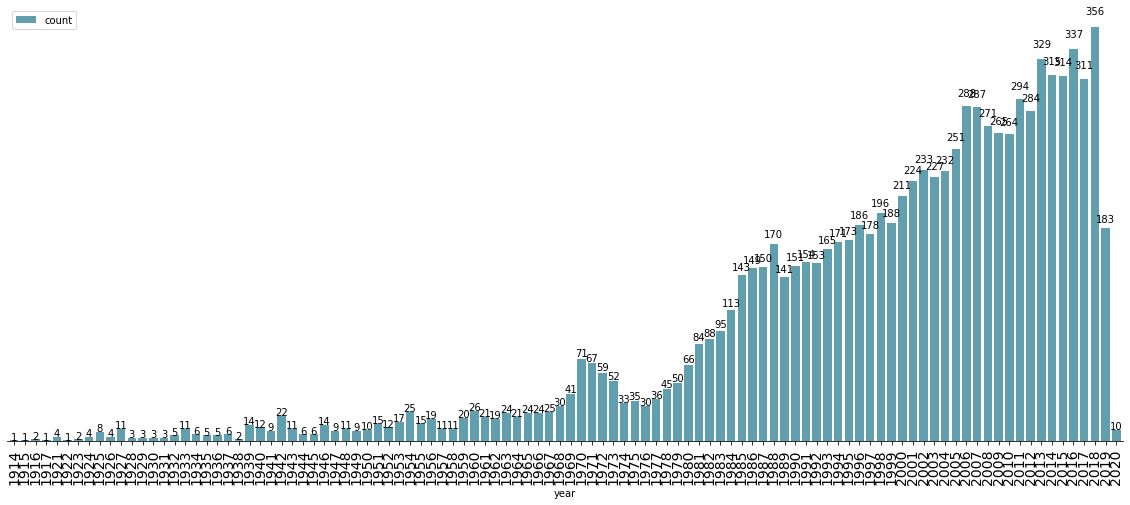

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

year_count = df1.groupby('year').count()[['title']]
year_count

ax=year_count.plot(kind='bar', figsize=(20,8), width=0.8, color=['#619EAE'],fontsize=14)

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_yticks([])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.03), ha='center')

ax.legend(['count'])

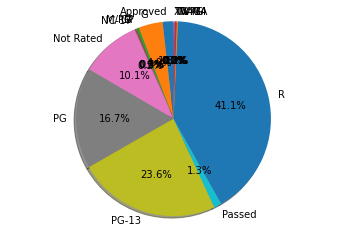

In [10]:
rating_count = df1.groupby('content_rating').count()[['title']].reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = tuple(rating_count['content_rating'])
sizes = list(rating_count['title'])
#explode = (0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','#A481CF']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()